In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import nglview as nv
import plumed

In [2]:
colvar = plumed.read_as_pandas('../COLVAR')
colvar.columns

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/nz/projects/FunnelMetadynamics/packages/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


Index(['time', 'd1', 'pp.proj', 'pp.ext', 'rmsd', 's_cent', 'beta_cent',
       'wall_width', 'wall_buffer', 'lwall.bias', 'lwall.force2', 'uwall.bias',
       'uwall.force2', 'uwall-rmsd.bias', 'uwall-rmsd.force2', 'wall_center',
       'scaling', 'spring', 'wall_bias', 'finalbias.bias',
       'finalbias.wall_bias_bias', 'meta.bias', 'meta.rbias', 'meta.rct'],
      dtype='object')

3.5218
12540


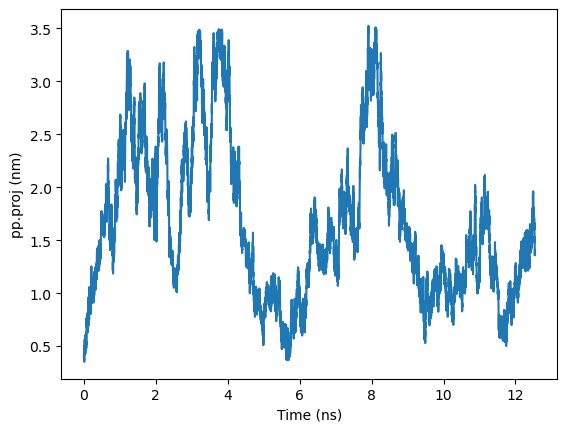

In [3]:
cv = colvar['pp.proj']
cv = colvar['d1']
print(np.max(cv))
time = colvar['time']
plt.plot(time/1000, cv)
plt.xlabel('Time (ns)')
plt.ylabel('pp.proj (nm)')
plt.savefig('pp_proj.png')
print(time.shape[0])

3.5218
12540


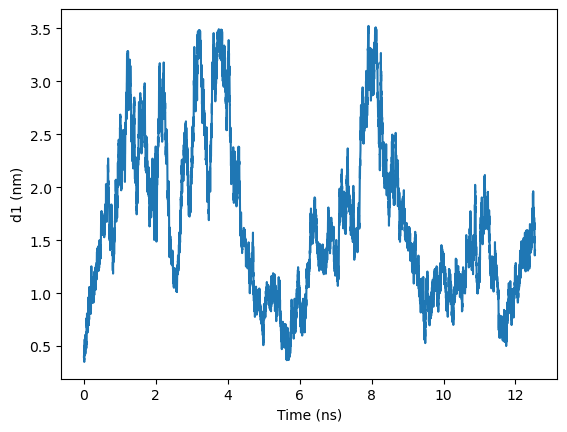

In [4]:
cv = colvar['d1']
print(np.max(cv))
time = colvar['time']
plt.plot(time/1000, cv)
plt.xlabel('Time (ns)')
plt.ylabel('d1 (nm)')
plt.savefig('d1.png')
print(time.shape[0])

Check the walls

In [6]:
cv = colvar['d1']
funnel = colvar['funnel.bias']
metad = colvar['metad.bias']
lwall = colvar['lwall.bias']
uwall = colvar['uwall.bias']
distwall = colvar['distwall.bias']
uwall_rmsd = colvar['urmsd.bias']
fps_ld = colvar['fps.ld']

KeyError: 'funnel.bias'

NameError: name 'funnel' is not defined

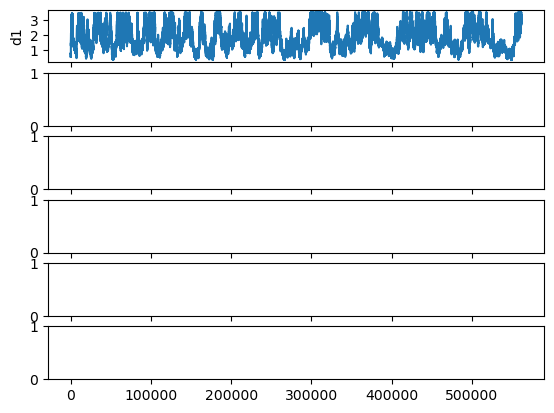

In [6]:

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, sharex=True)
ax1.plot(time, cv)
ax1.set_ylabel('d1')
ax2.plot(time, funnel)
ax2.set_ylabel('funnel bias')
ax3.plot(time, lwall)
ax3.set_ylabel('lwall bias')
ax4.plot(time,uwall)
ax4.set_ylabel('uwall bias')
ax5.plot(time, distwall)
ax5.set_ylabel('distwall bias')
ax6.plot(time, metad)
ax6.set_ylabel('metad bias')
plt.savefig('all_walls.png')

In [7]:
metad = colvar['metad.bias']
time = colvar['time']
plt.plot(time, metad)
plt.xlabel('Time (Ps)')
plt.ylabel(r'metad $kjmol^{-1}$')
plt.savefig('metad.png')

KeyError: 'metad.bias'

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/nz/projects/FunnelMetadynamics/packages/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


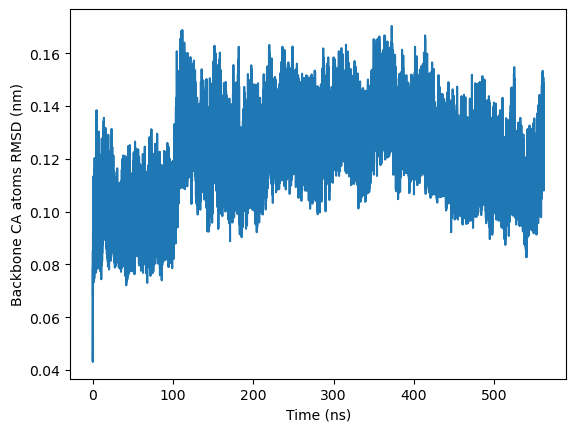

In [14]:
# plot rmsd
rmsd_data = plumed.read_as_pandas('../outputs/rmsd')
plt.plot(rmsd_data['time']/1000, rmsd_data['rmsd'])
plt.xlabel('Time (ns)')
plt.ylabel('Backbone CA atoms RMSD (nm)')
plt.savefig('figures/rmsd.png')


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/nz/projects/FunnelMetadynamics/packages/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


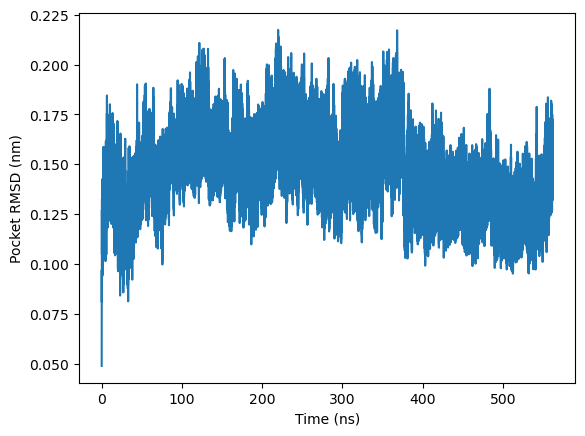

In [17]:
# plot rmsd
rmsd_data = plumed.read_as_pandas('../outputs/rmsd_pocket')
plt.plot(rmsd_data['time']/1000, rmsd_data['rmsd'])
plt.xlabel('Time (ns)')
plt.ylabel('Pocket RMSD (nm)')
plt.savefig('figures/rmsd_pocket.png')

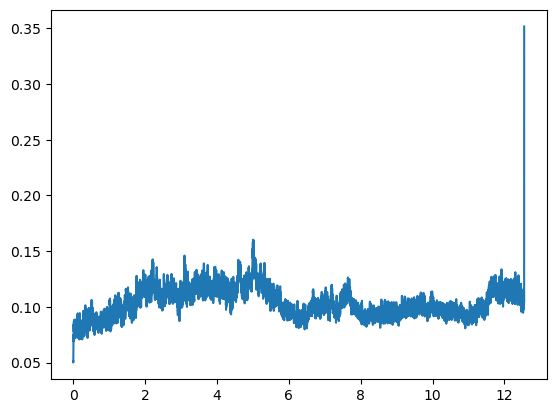

In [14]:
# calc rmsd using mdtraj
import mdtraj  as mdj
import numpy  as np
pdb = mdj.load_pdb('../inputs/protein_ligand.pdb')
traj = mdj.load_dcd('../outputs/traj.dcd', '../inputs/protein_ligand.pdb')
reference_idxs = pdb.topology.select('protein and name CA')
rmsd = mdj.rmsd(traj, pdb, atom_indices=reference_idxs)
plt.plot(np.arange(len(rmsd))/1000, rmsd)

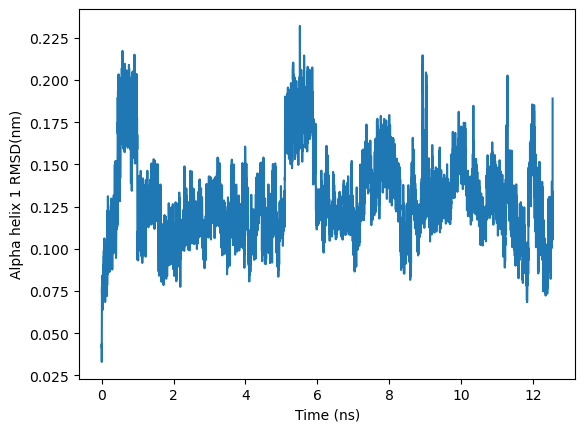

In [15]:
import mdtraj  as mdj
import numpy  as np
reference_idxs = np.arange(2105, 2192)
rmsd = mdj.rmsd(traj, pdb, atom_indices=reference_idxs)
plt.plot(np.arange(len(rmsd))/1000, rmsd)
plt.xlabel('Time (ns)')
plt.ylabel('Alpha helix 1 RMSD(nm)')
plt.savefig('figures/helix1_rmsd.png')

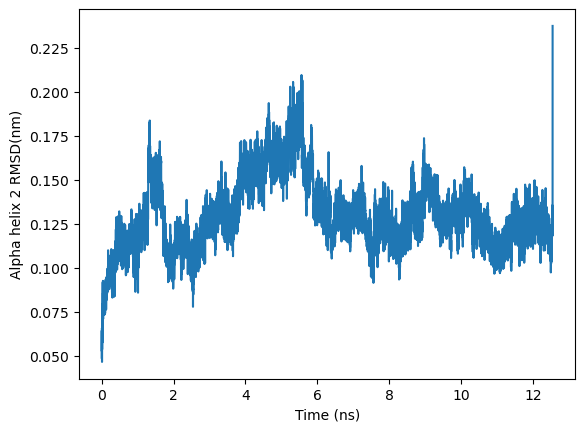

In [16]:
import mdtraj  as mdj
import numpy  as np
reference_idxs = np.arange(3021, 3205)
rmsd = mdj.rmsd(traj, pdb, atom_indices=reference_idxs)
plt.plot(np.arange(len(rmsd))/1000, rmsd)
plt.xlabel('Time (ns)')
plt.ylabel('Alpha helix 2 RMSD(nm)')
plt.savefig('figures/helix2_rmsd.png')

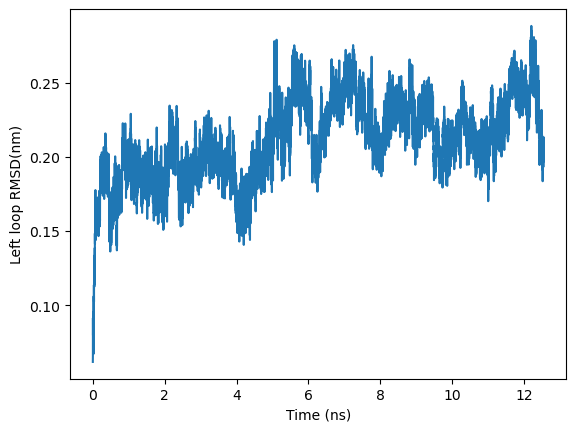

In [17]:
# let loop RMSD
import mdtraj  as mdj
import numpy  as np
reference_idxs = np.arange(2767, 2924)
rmsd = mdj.rmsd(traj, pdb, atom_indices=reference_idxs)
plt.plot(np.arange(len(rmsd))/1000, rmsd)
plt.xlabel('Time (ns)')
plt.ylabel('Left loop RMSD(nm)')
plt.savefig('figures/left_loop_rmsd.png')

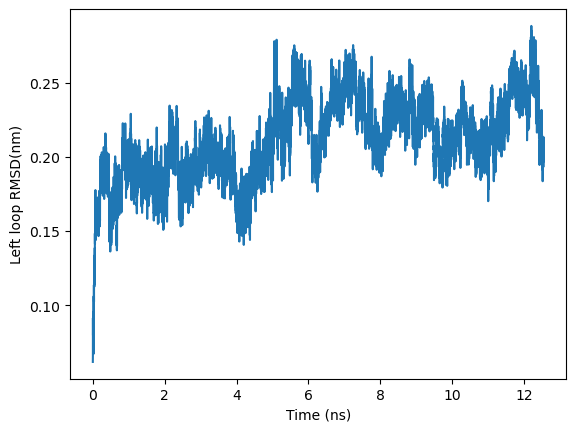

In [18]:
import mdtraj  as mdj
import numpy  as np
reference_idxs = np.arange(2767, 2924)
rmsd = mdj.rmsd(traj, pdb, atom_indices=reference_idxs)
plt.plot(np.arange(len(rmsd))/1000, rmsd)
plt.xlabel('Time (ns)')
plt.ylabel('Left loop RMSD(nm)')
plt.savefig('figures/left_loop_rmsd.png')

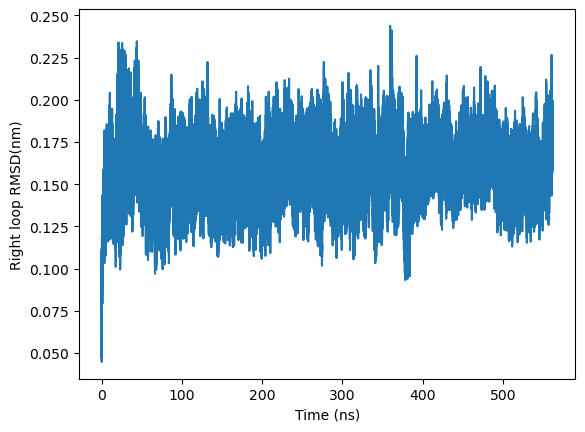

In [29]:
import mdtraj  as mdj
import numpy  as np
reference_idxs = np.arange(2366, 2533)
rmsd = mdj.rmsd(traj, pdb, atom_indices=reference_idxs)
plt.plot(time/1000, rmsd)
plt.xlabel('Time (ns)')
plt.ylabel('Right loop RMSD(nm)')
plt.savefig('figures/right_loop_rmsd.png')

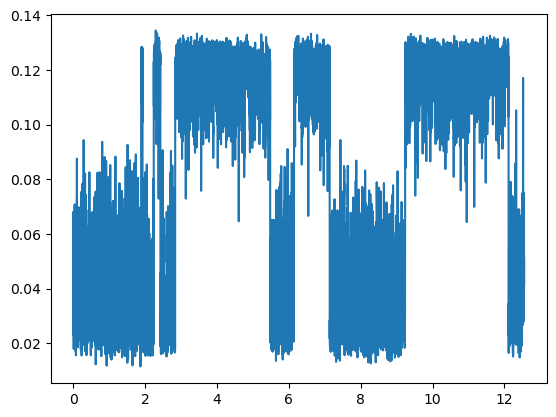

In [19]:
import mdtraj  as mdj
import numpy  as np
pdb = mdj.load_pdb('../inputs/protein_ligand.pdb')
traj = mdj.load_dcd('../outputs/traj.dcd', '../inputs/protein_ligand.pdb')
reference_idxs = pdb.topology.select('resname MOL')
rmsd = mdj.rmsd(traj, pdb, atom_indices=reference_idxs)
plt.plot(np.arange(len(rmsd))/1000, rmsd)